# Homework 1

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing

In [1]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Exercise 1

To first use the `f_classif` function, we first have to state explicitly which variables are considered inputs and which one is the output variable.

After this, we can use the `f_classif` function to get the F1-score between each input variable and the output variable.

In [2]:
from sklearn.feature_selection import f_classif

df_inputs = df.drop('class', axis=1)
df_outputs = df['class']

In [3]:
f_values, p_values = f_classif(df_inputs, df_outputs)

# Display output in a nicely arranged table
fimportance_data = {
    'Variable': df.columns.values[:-1],
    'F1-score': f_values,
    'P-value': p_values
}
fimportance_df = pd.DataFrame(fimportance_data)
display(fimportance_df)

,Variable,F1-score,P-value
0,pelvic_incidence,98.539709,8.752849e-34
1,pelvic_tilt,21.299194,2.176879e-09
2,lumbar_lordosis_angle,114.982840,5.357329e-38
3,sacral_slope,89.643953,2.175670e-31
4,pelvic_radius,16.866935,1.121996e-07
5,degree_spondylolisthesis,119.122881,5.114732e-39


Since the F1-score is directly related to the discriminative power of a variable, then we can conclude that the `sacral_slope` has the lowest discriminative power, while `degree_spondylolisthesis` has the highest one.

Next, let's plot the class-conditional probability functions for these two variables.

In [4]:
# Get the name of the most and the least discriminative variables
most_discriminative = df.columns[np.argmax(f_values)]
least_discriminative = df.columns[np.argmin(f_values)]

# Fetch the respective data
most_discriminative_data = df_inputs[most_discriminative]
least_discriminative_data = df_inputs[least_discriminative]

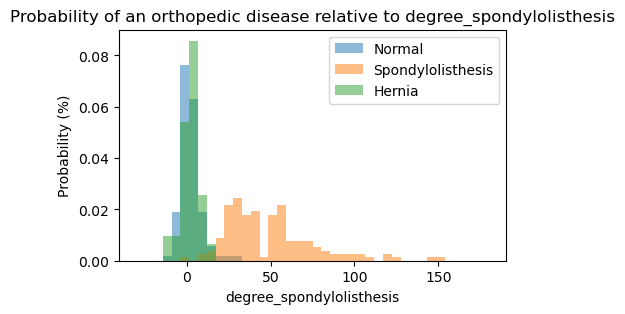

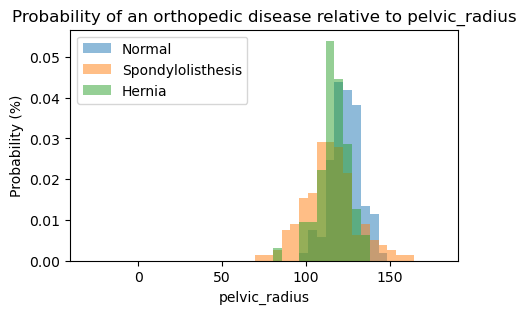

In [5]:
import matplotlib.pyplot as plt

# Draw the class-conditional histogram for the most discriminative variable
plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(most_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(most_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + most_discriminative)
plt.show()

# Draw the class-conditional histogram for the least discriminative variable
plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(least_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(least_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + least_discriminative)
plt.show()

## Exercise 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]
num_runs = 10

In [12]:
avg_train_accuracies = []
avg_test_accuracies = []
for depth in depth_limits:
    total_train_acc = []
    total_test_acc = []

    # Use 10 runs per parametrization
    for i in range(num_runs):
        # Split data into training and testing sets with a stratified 70-30 split and a fixed seed
        input_train, input_test, output_train, output_test = \
            train_test_split(df_inputs, df_outputs, train_size=0.7, random_state=0, stratify=df_outputs)

        # Train a decision tree classifier with the specified depth limit
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        clf.fit(input_train, output_train)

        # Calculate training accuracy
        train_pred = clf.score(input_train, output_train)
        total_train_acc.append(train_pred)

        # Calculate testing accuracy
        test_pred = clf.score(input_test, output_test)
        total_test_acc.append(test_pred)

    # Calculate the average training and testing accuracies for this depth limit
    avg_train_accuracy = np.mean(total_train_acc)
    avg_test_accuracy = np.mean(total_test_acc)

    avg_train_accuracies.append(avg_train_accuracy)
    avg_test_accuracies.append(avg_test_accuracy)

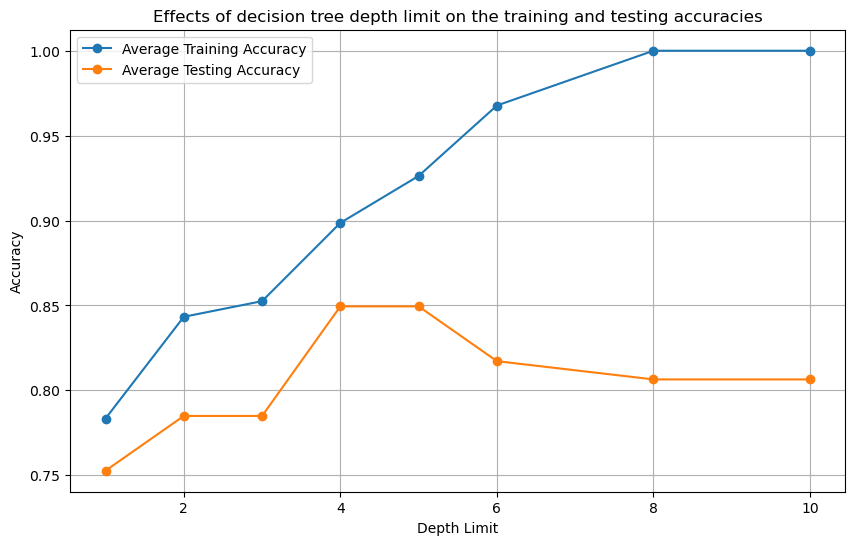

In [13]:
# Create a plot to show for average training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, avg_train_accuracies, label='Average Training Accuracy', marker='o')
plt.plot(depth_limits, avg_test_accuracies, label='Average Testing Accuracy', marker='o')
plt.title('Effects of decision tree depth limit on the training and testing accuracies')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3

As the gap between the training and testing accuracies widens, we approach signs of overfitting. This occurs when a model becomes overly complex due to analysing noise from the training data set.

Initially, when we have lower depth limits in the decision tree, there is a relatively smaller difference between the training and testing accuracies. However, both accuracies are relatively low, suggesting that the model is not capturing enough information from the training data, thus resulting in lower performance on both datasets.

However, as we progressively increase the depth limits, we notice the difference between training and testing accuracy starts to grow. This widening gap indicates that the model is becoming more complex and has the capacity to fit the training data more closely. However, when it comes to testing the model, it starts picking up too much noise from the training data set, and starts to overcomplicate some predictions.

A depth limit of 4 or 5 appears to be the most apropriate for achieving the best accuracy while not being to far away from the accuracy of the training data. 

## Exercise 4

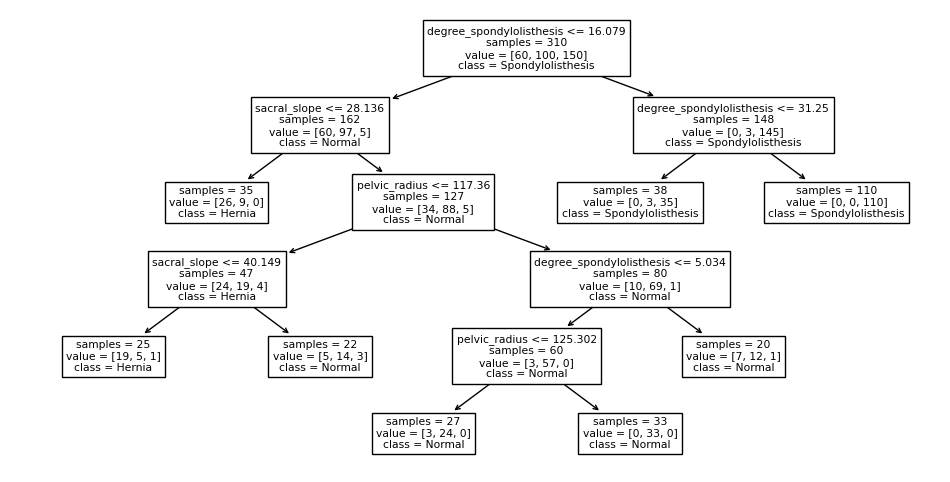

In [9]:
from sklearn import tree

# Create a decision tree, ensuring that each leaf has at least 20 data records, and a random seed of 0
predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(df_inputs, df_outputs)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=list(df.columns), class_names=list(predictor.classes_), impurity=False)
plt.show()

From the decision tree above, we can caracterize a hernia condition when the following conditions are met:

- degree_spondylolisthesis: lower than or equal to 16.079
- sacral_slope: lower than or equal to 28.136

OR 

- degree_spondylolisthesis: lower than or equal to 16.079
- sacral_slope: between 28.136 and 40.149
- pelvic_radius: lower than or equal to 117.36